# 2. DATA UNDERSTANDING 

----

### IMPORTING THE NECESSARY LIBRARIES 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

#### LOADING DATASETS

In [2]:
inflation_data = pd.read_csv('Inflation Rates.csv')

In [3]:
commodity_data = pd.read_excel('commodity prices.xlsx',header=0)

In [4]:
annual_gdp_data = pd.read_csv('Annual GDP.csv')

In [5]:
forex_data = pd.read_csv("Exchange Rates.csv")

In [6]:
commodity_data.columns

Index(['date ', 'price of bread (400g)', 'Refined Vegetable oil (1L)',
       'Cows Milk(Fresh,Pasteurized) -500ML', ' Diesel (1L)',
       'Maize meal(2kg)', 'Gasoline (1L)'],
      dtype='object')

In [7]:
forex_data.tail()

,Date,Currency,Mean,Buy,Sell
4330,24/03/2023,US DOLLAR,131.2735,131.1735,131.3735
4331,27/03/2023,US DOLLAR,131.3971,131.2971,131.4971
4332,28/03/2023,US DOLLAR,131.5294,131.4294,131.6294
4333,29/03/2023,US DOLLAR,131.7765,131.6765,131.8765
4334,30/03/2023,US DOLLAR,132.1265,132.0265,132.2265


#### DATA DESCRIPTION

#### 1. Commodities data 

In [8]:
commodity_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89


In [9]:
commodity_data.tail()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
202,2022-11-30,60.0,599.0,55.0,162.0,211.0,177.3
203,2022-12-31,60.0,599.0,60.0,162.0,202.0,177.3
204,2023-01-31,60.0,599.0,53.0,162.0,185.0,177.3
205,2023-02-28,NaN,NaN,NaN,NaN,NaN,NaN
206,2023-03-31,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
commodity_data.shape

(207, 7)

In [11]:
commodity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 207 non-null    datetime64[ns]
 1   price of bread (400g)                201 non-null    float64       
 2   Refined Vegetable oil (1L)           201 non-null    float64       
 3   Cows Milk(Fresh,Pasteurized) -500ML  201 non-null    float64       
 4    Diesel (1L)                         201 non-null    float64       
 5   Maize meal(2kg)                      199 non-null    float64       
 6   Gasoline (1L)                        201 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 11.4 KB


In [12]:
commodity_data.describe()

,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
count,201.000000,201.000000,201.000000,201.000000,199.000000,201.000000
mean,43.447761,250.298507,39.930348,94.028259,99.665745,104.263831
std,9.208068,105.660733,11.519337,19.349478,33.039653,20.595156
min,26.000000,108.000000,20.000000,64.990000,12.000000,74.000000
25%,34.000000,180.000000,28.000000,78.300000,83.000000,88.990000
50%,46.000000,233.000000,45.000000,94.600000,103.000000,104.100000
75%,50.000000,313.000000,50.000000,105.210000,115.000000,113.680000
max,63.000000,622.000000,60.000000,165.000000,211.000000,179.300000


#### 2. Inflation data 

In [13]:
inflation_data.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,February,8.30,9.23
1,2023,January,7.95,8.98
2,2022,December,7.66,9.06
3,2022,November,7.38,9.48
4,2022,October,7.48,9.59


In [14]:
inflation_data[['Year','Month']]

,Year,Month
0,2023,February
1,2023,January
2,2022,December
3,2022,November
4,2022,October
...,...,...
202,2006,May
203,2006,April
204,2006,March
205,2006,February


In [15]:
inflation_data.tail()

,Year,Month,Annual Average Inflation,12-Month Inflation
202,2006,May,6.95,4.47
203,2006,April,7.77,5.44
204,2006,March,8.61,8.85
205,2006,February,9.01,9.39
206,2006,January,9.36,8.39


In [16]:
inflation_data.shape

(207, 4)

In [17]:
inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      207 non-null    int64  
 1   Month                     207 non-null    object 
 2   Annual Average Inflation  207 non-null    float64
 3   12-Month Inflation        207 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.6+ KB


In [18]:
inflation_data.describe()

,Year,Annual Average Inflation,12-Month Inflation
count,207.000000,207.000000,207.000000
mean,2014.111111,7.388599,7.437343
std,4.966120,3.227572,3.958024
min,2006.000000,3.930000,1.850000
25%,2010.000000,5.335000,5.000000
50%,2014.000000,6.340000,6.310000
75%,2018.000000,7.880000,8.305000
max,2023.000000,17.070000,19.720000


#### 3. Annual GDP 

In [19]:
annual_gdp_data.head()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
0,2021,"12,098,200",7.5,"9,391,684"
1,2020,"10,716,034",-0.3,"8,735,040"
2,2019,"10,237,727",5.1,"8,756,946"
3,2018,"9,340,307",5.6,"8,330,891"
4,2017,"8,483,396",3.8,"7,885,521"


In [20]:
annual_gdp_data.tail()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
18,2003,"1,131,783",2.9,"1,055,658"
19,2002,"1,035,374",0.5,"1,025,583"
20,2001,"1,020,022",3.8,"1,020,111"
21,2000,"967,838",0.0,"982,855"
22,0,0,0.0,0


In [21]:
annual_gdp_data.shape

(23, 4)

In [22]:
annual_gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              23 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  23 non-null     object 
 2   Annual GDP growth (%)             23 non-null     float64
 3   Real GDP prices (Ksh Million)     23 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 864.0+ bytes


In [23]:
annual_gdp_data.describe()

,Year,Annual GDP growth (%)
count,23.000000,23.000000
mean,1923.086957,4.047826
std,419.266233,2.404138
min,0.000000,-0.300000
25%,2004.500000,2.800000
50%,2010.000000,4.600000
75%,2015.500000,5.350000
max,2021.000000,8.100000


#### 4. Forex data 

In [24]:
forex_data.head()

,Date,Currency,Mean,Buy,Sell
0,03/01/2006,US DOLLAR,72.4111,72.3111,72.5111
1,04/01/2006,US DOLLAR,72.7356,72.6356,72.8356
2,05/01/2006,US DOLLAR,72.9800,72.8800,73.0800
3,06/01/2006,US DOLLAR,73.3056,73.2056,73.4056
4,09/01/2006,US DOLLAR,72.8778,72.7778,72.9778


In [25]:
forex_data.tail()

,Date,Currency,Mean,Buy,Sell
4330,24/03/2023,US DOLLAR,131.2735,131.1735,131.3735
4331,27/03/2023,US DOLLAR,131.3971,131.2971,131.4971
4332,28/03/2023,US DOLLAR,131.5294,131.4294,131.6294
4333,29/03/2023,US DOLLAR,131.7765,131.6765,131.8765
4334,30/03/2023,US DOLLAR,132.1265,132.0265,132.2265


In [26]:
forex_data.shape

(4335, 5)

In [27]:
forex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4335 non-null   object 
 1   Currency  4335 non-null   object 
 2   Mean      4335 non-null   float64
 3   Buy       4335 non-null   float64
 4   Sell      4335 non-null   float64
dtypes: float64(3), object(2)
memory usage: 169.5+ KB


In [28]:
forex_data.describe()

,Mean,Buy,Sell
count,4335.000000,4335.000000,4335.000000
mean,91.956527,91.862898,92.050223
std,15.334699,15.326446,15.343025
min,61.510600,61.438900,61.582200
25%,80.114700,80.045550,80.185000
50%,90.733300,90.625000,90.877800
75%,103.121150,103.021150,103.221150
max,132.126500,132.026500,132.226500


# 3. DATA PREPARATION  

---

In [29]:
### Dealing with missing values 

commodity_data.isna().sum()

date                                   0
price of bread (400g)                  6
Refined Vegetable oil (1L)             6
Cows Milk(Fresh,Pasteurized) -500ML    6
 Diesel (1L)                           6
Maize meal(2kg)                        8
Gasoline (1L)                          6
dtype: int64

In [30]:
# Price of bread 
commodity_data = commodity_data.fillna(method='ffill')

In [31]:
inflation_data.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,February,8.30,9.23
1,2023,January,7.95,8.98
2,2022,December,7.66,9.06
3,2022,November,7.38,9.48
4,2022,October,7.48,9.59


In [32]:
# convert year and month columns to datetime format
inflation_data['date'] = pd.to_datetime(inflation_data['Year'].astype(str) + '-' + inflation_data['Month'].astype(str), format='%Y-%B')

# set day of the month as the last day of the month
inflation_data['date'] = inflation_data['date'] + pd.offsets.MonthEnd(0)

# drop the original year and month columns
inflation_data.drop(['Year', 'Month'], axis=1, inplace=True)

# print the resulting DataFrame
inflation_data.head()

,Annual Average Inflation,12-Month Inflation,date
0,8.30,9.23,2023-02-28
1,7.95,8.98,2023-01-31
2,7.66,9.06,2022-12-31
3,7.38,9.48,2022-11-30
4,7.48,9.59,2022-10-31


In [33]:
inflation_data.isna().sum()

Annual Average Inflation    0
12-Month Inflation          0
date                        0
dtype: int64

In [34]:
inflation_data.shape

(207, 3)

In [35]:
commodity_data.shape

(207, 7)

In [36]:
commodity_data = commodity_data.rename(columns={'date ':'date'})
commodity_data.columns

Index(['date', 'price of bread (400g)', 'Refined Vegetable oil (1L)',
       'Cows Milk(Fresh,Pasteurized) -500ML', ' Diesel (1L)',
       'Maize meal(2kg)', 'Gasoline (1L)'],
      dtype='object')

In [37]:
commodity_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89


In [38]:
inflation_data.tail()

,Annual Average Inflation,12-Month Inflation,date
202,6.95,4.47,2006-05-31
203,7.77,5.44,2006-04-30
204,8.61,8.85,2006-03-31
205,9.01,9.39,2006-02-28
206,9.36,8.39,2006-01-31


In [39]:
inflation_data.head()

,Annual Average Inflation,12-Month Inflation,date
0,8.30,9.23,2023-02-28
1,7.95,8.98,2023-01-31
2,7.66,9.06,2022-12-31
3,7.38,9.48,2022-11-30
4,7.48,9.59,2022-10-31


In [40]:
inflation_data = inflation_data.sort_values('date')
inflation_data.head()

,Annual Average Inflation,12-Month Inflation,date
206,9.36,8.39,2006-01-31
205,9.01,9.39,2006-02-28
204,8.61,8.85,2006-03-31
203,7.77,5.44,2006-04-30
202,6.95,4.47,2006-05-31


In [41]:
commodity_data.set_index('date', inplace=True)

In [42]:
commodity_data.head()

,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
date,,,,,,
2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99
2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99
2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99
2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64
2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89


In [43]:
inflation_data.head()

,Annual Average Inflation,12-Month Inflation,date
206,9.36,8.39,2006-01-31
205,9.01,9.39,2006-02-28
204,8.61,8.85,2006-03-31
203,7.77,5.44,2006-04-30
202,6.95,4.47,2006-05-31


In [44]:
time_series_data = pd.merge(commodity_data, inflation_data, on='date')

In [45]:
time_series_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L),Annual Average Inflation,12-Month Inflation
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99,9.36,8.39
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99,9.01,9.39
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99,8.61,8.85
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64,7.77,5.44
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89,6.95,4.47


In [46]:

forex_data['date'] = pd.to_datetime(forex_data['Date'], format='%d/%m/%Y')
forex_data.drop("Date", axis=1, inplace=True)
forex_data.set_index("date", inplace=True)
#time_series_data = pd.merge(time_series_data, forex_data, on='date')

In [47]:
# assume forex_data is a DataFrame with a DatetimeIndex
# resample to monthly frequency with average daily exchange rates
forex_data = forex_data.resample('M').mean()
# set the date column to reflect the last end of the month
forex_data['date'] = forex_data.resample('M').mean().index + pd.offsets.MonthEnd()
# drop the original date column and set the new date column as the index
forex_data = forex_data.drop('date', axis=1)

In [48]:
time_series_data = pd.merge(time_series_data, forex_data, on='date')

In [49]:
time_series_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L),Annual Average Inflation,12-Month Inflation,Mean,Buy,Sell
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99,9.36,8.39,72.214348,72.114819,72.313867
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99,9.01,9.39,71.803565,71.712730,71.894390
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99,8.61,8.85,72.281478,72.205787,72.357148
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64,7.77,5.44,71.303518,71.231894,71.375159
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89,6.95,4.47,71.763555,71.683132,71.843986


In [50]:
time_series_data.set_index('date', inplace=True)

In [51]:
time_series_data.shape

(207, 11)

In [52]:
time_series_data.isna().sum()

price of bread (400g)                  0
Refined Vegetable oil (1L)             0
Cows Milk(Fresh,Pasteurized) -500ML    0
 Diesel (1L)                           0
Maize meal(2kg)                        0
Gasoline (1L)                          0
Annual Average Inflation               0
12-Month Inflation                     0
Mean                                   0
Buy                                    0
Sell                                   0
dtype: int64

In [53]:
time_series_data.head()

,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L),Annual Average Inflation,12-Month Inflation,Mean,Buy,Sell
date,,,,,,,,,,,
2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99,9.36,8.39,72.214348,72.114819,72.313867
2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99,9.01,9.39,71.803565,71.712730,71.894390
2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99,8.61,8.85,72.281478,72.205787,72.357148
2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64,7.77,5.44,71.303518,71.231894,71.375159
2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89,6.95,4.47,71.763555,71.683132,71.843986


In [54]:
time_series_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2006-01-31 to 2023-02-28
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   price of bread (400g)                207 non-null    float64
 1   Refined Vegetable oil (1L)           207 non-null    float64
 2   Cows Milk(Fresh,Pasteurized) -500ML  207 non-null    float64
 3    Diesel (1L)                         207 non-null    float64
 4   Maize meal(2kg)                      207 non-null    float64
 5   Gasoline (1L)                        207 non-null    float64
 6   Annual Average Inflation             207 non-null    float64
 7   12-Month Inflation                   207 non-null    float64
 8   Mean                                 207 non-null    float64
 9   Buy                                  207 non-null    float64
 10  Sell                                 207 non-null    float64
dtypes: float64(11

In [55]:
time_series_data.duplicated().sum()

1

In [56]:
time_series_data = time_series_data.drop_duplicates()

In [57]:
time_series_data = time_series_data.drop(['Annual Average Inflation', 'Mean', 'Sell'], axis=1)

# 4. EXPLORATORY DATA ANALYSIS 

---

### Price of bread over the years 

<AxesSubplot: xlabel='date'>

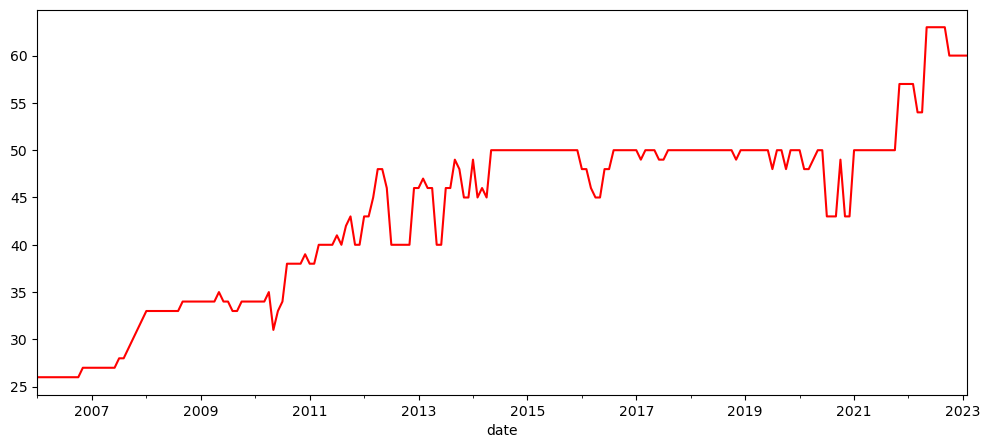

In [58]:
time_series_data['price of bread (400g)'].plot(figsize=(12,5), color='red')

### Price of Vegetable oil over the years 

<AxesSubplot: xlabel='date'>

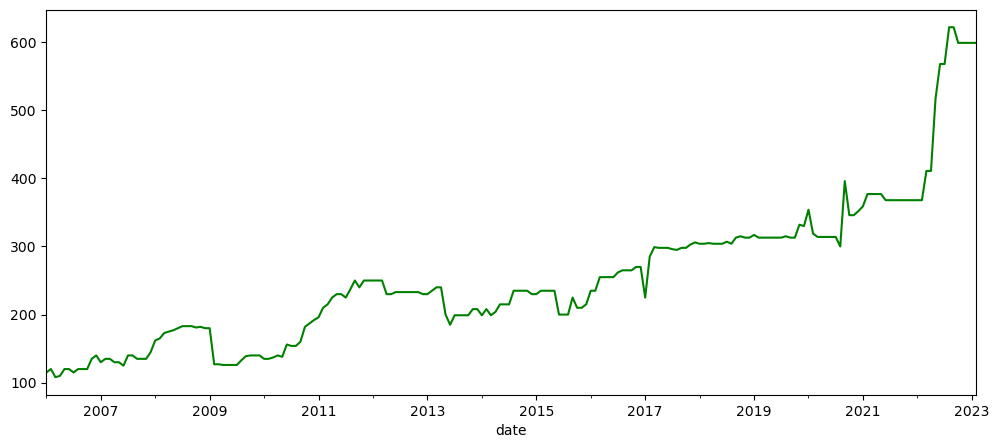

In [59]:
time_series_data['Refined Vegetable oil (1L)'].plot(figsize=(12,5), color="green")

### Price of milk over the years

<AxesSubplot: xlabel='date'>

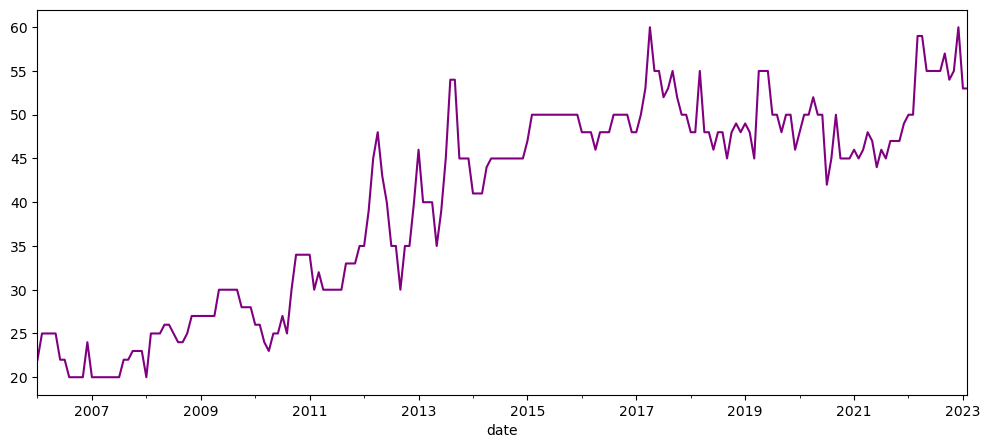

In [60]:
time_series_data['Cows Milk(Fresh,Pasteurized) -500ML'].plot(figsize=(12,5), color="purple")

### Price of Diesel over the years

<AxesSubplot: xlabel='date'>

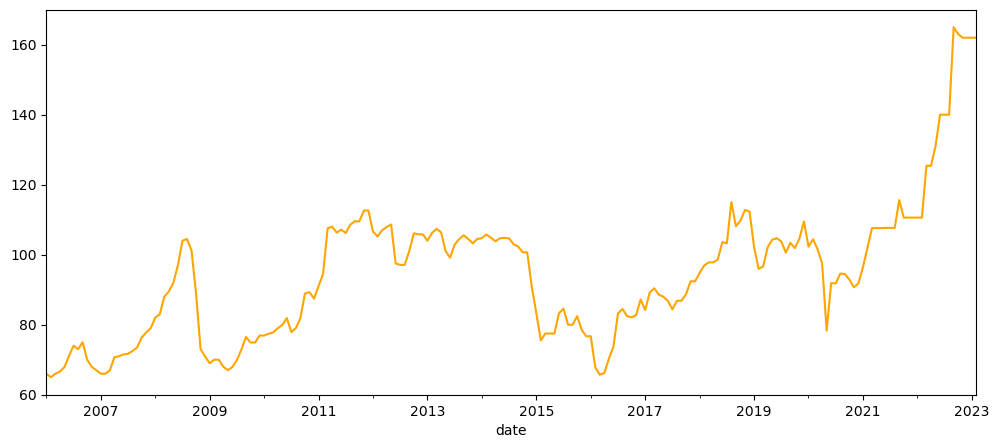

In [61]:
time_series_data[' Diesel (1L)'].plot(figsize=(12,5), color="orange")

### Price of Maize meal over the years

<AxesSubplot: xlabel='date'>

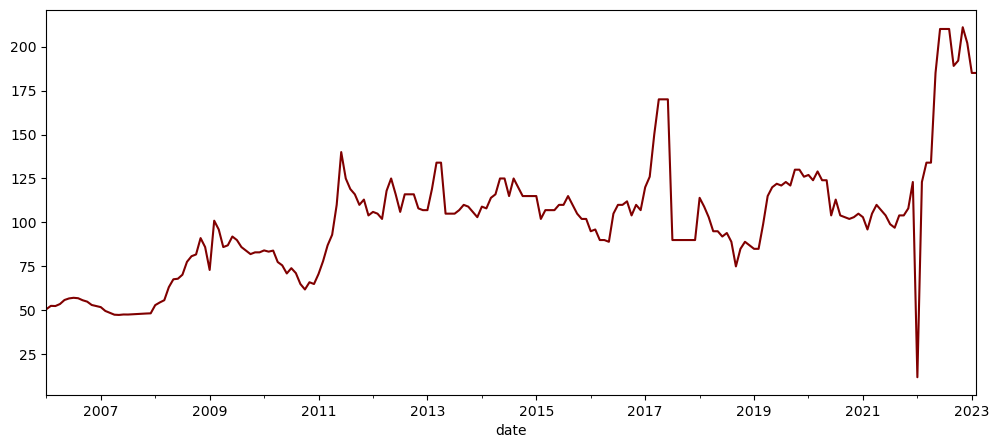

In [62]:
time_series_data['Maize meal(2kg)'].plot(figsize=(12,5), color="maroon")

### Price of Gasoline over the years

<AxesSubplot: xlabel='date'>

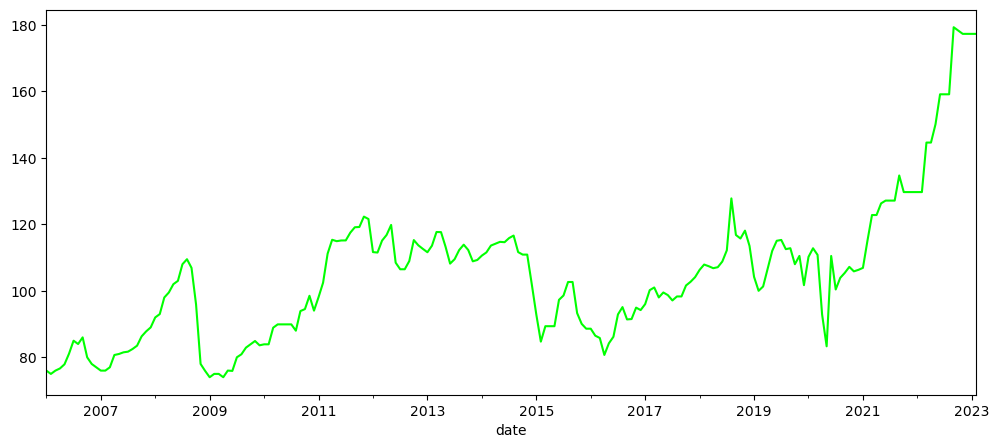

In [63]:
time_series_data['Gasoline (1L)'].plot(figsize=(12,5), color="lime")

### Price of 12-month inflation over the years

<AxesSubplot: xlabel='date'>

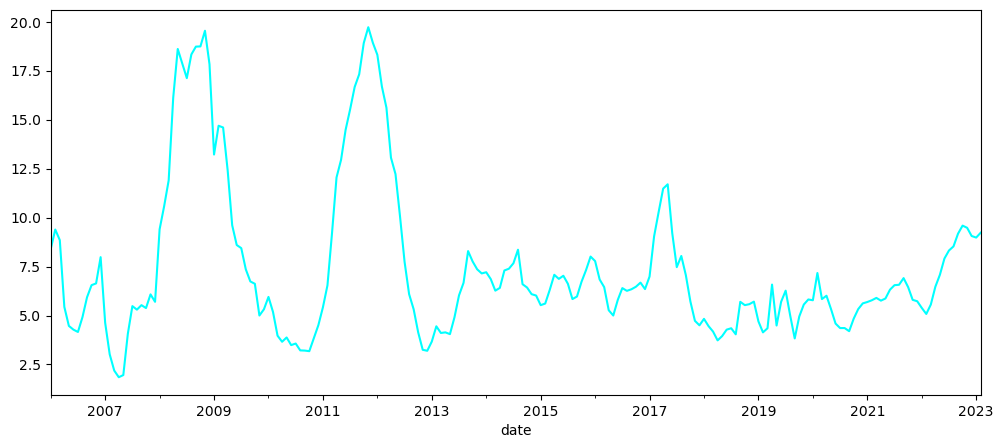

In [64]:
time_series_data['12-Month Inflation'].plot(figsize=(12,5), color="Cyan")

### Price of US-DOLLAR over the years

<AxesSubplot: xlabel='date'>

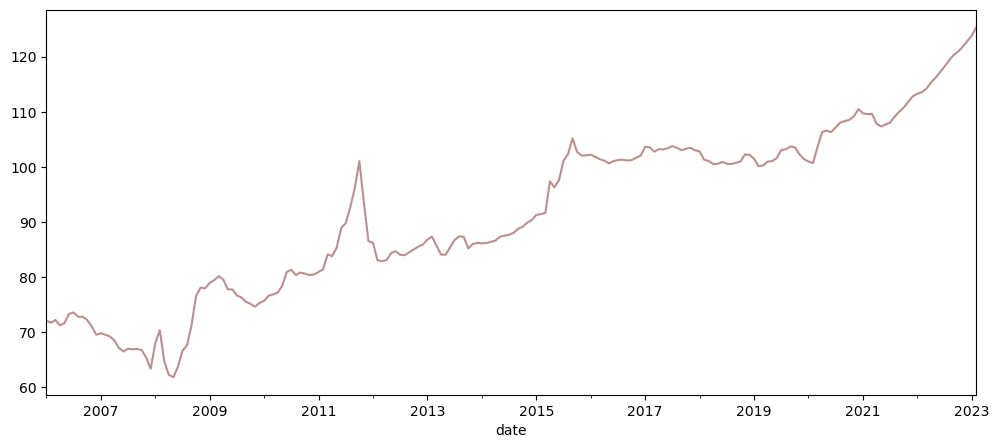

In [65]:
time_series_data['Buy'].plot(figsize=(12,5), color="RosyBrown")

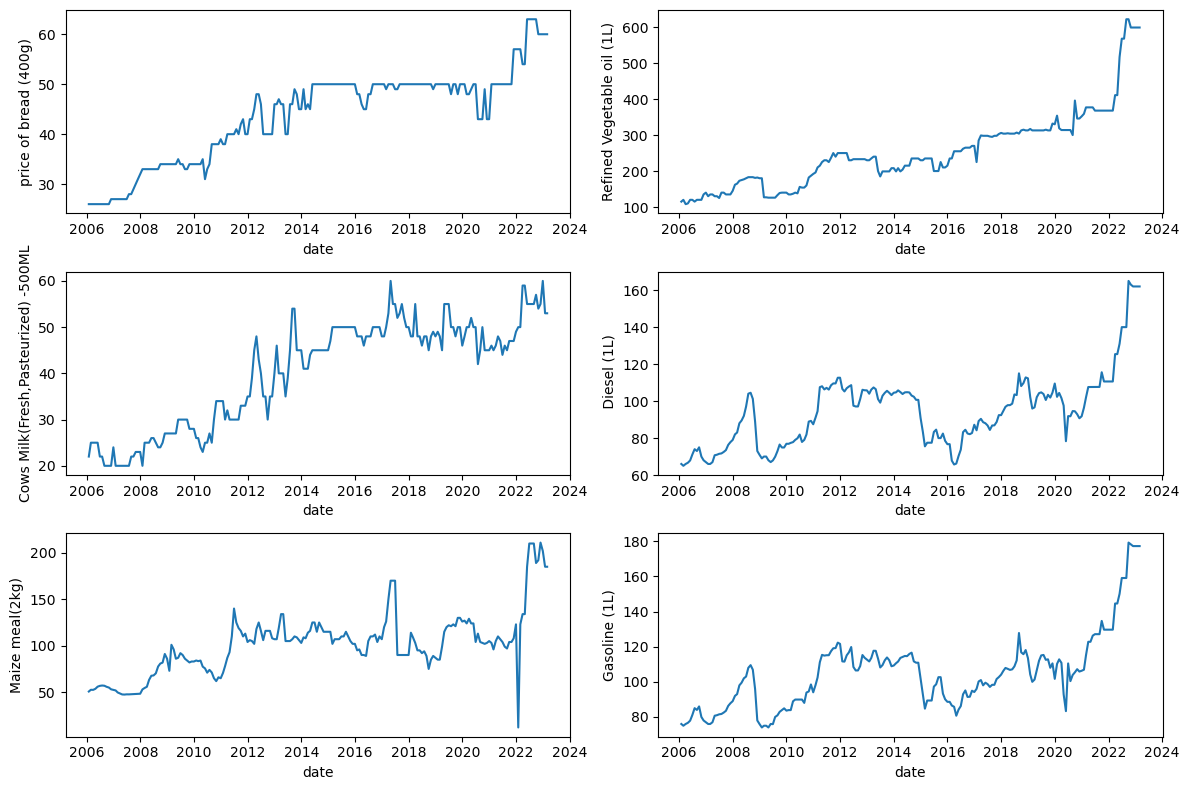

In [66]:
# Plot time series data
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
sns.lineplot(data=time_series_data['price of bread (400g)'], ax=axs[0,0])
sns.lineplot(data=time_series_data['Refined Vegetable oil (1L)'], ax=axs[0,1])
sns.lineplot(data=time_series_data['Cows Milk(Fresh,Pasteurized) -500ML'], ax=axs[1,0])
sns.lineplot(data=time_series_data[' Diesel (1L)'], ax=axs[1,1])
sns.lineplot(data=time_series_data['Maize meal(2kg)'], ax=axs[2,0])
sns.lineplot(data=time_series_data['Gasoline (1L)'], ax=axs[2,1])
plt.tight_layout()
plt.show()

#### Commodity Prices and Inflation over Time

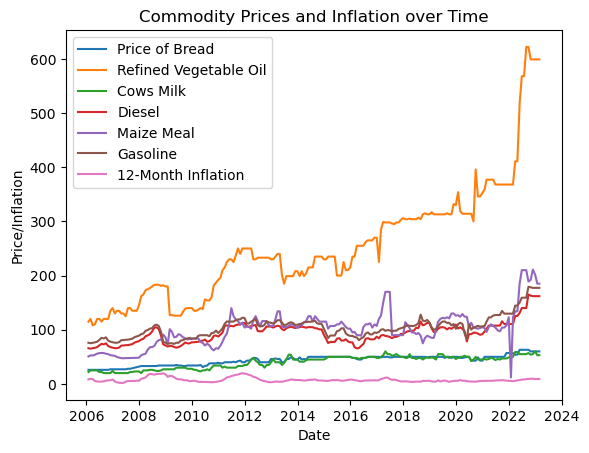

In [67]:
# Assuming your data is in a pandas DataFrame called df with date as the index and columns for each commodity and the economic indicator
plt.plot(time_series_data.index, time_series_data['price of bread (400g)'], label='Price of Bread')
plt.plot(time_series_data.index, time_series_data['Refined Vegetable oil (1L)'], label='Refined Vegetable Oil')
plt.plot(time_series_data.index, time_series_data['Cows Milk(Fresh,Pasteurized) -500ML'], label='Cows Milk')
plt.plot(time_series_data.index, time_series_data[' Diesel (1L)'], label='Diesel')
plt.plot(time_series_data.index, time_series_data['Maize meal(2kg)'], label='Maize Meal')
plt.plot(time_series_data.index, time_series_data['Gasoline (1L)'], label='Gasoline')
plt.plot(time_series_data.index, time_series_data['12-Month Inflation'], label='12-Month Inflation')

plt.xlabel('Date')
plt.ylabel('Price/Inflation')
plt.title('Commodity Prices and Inflation over Time')
plt.legend()

plt.show()

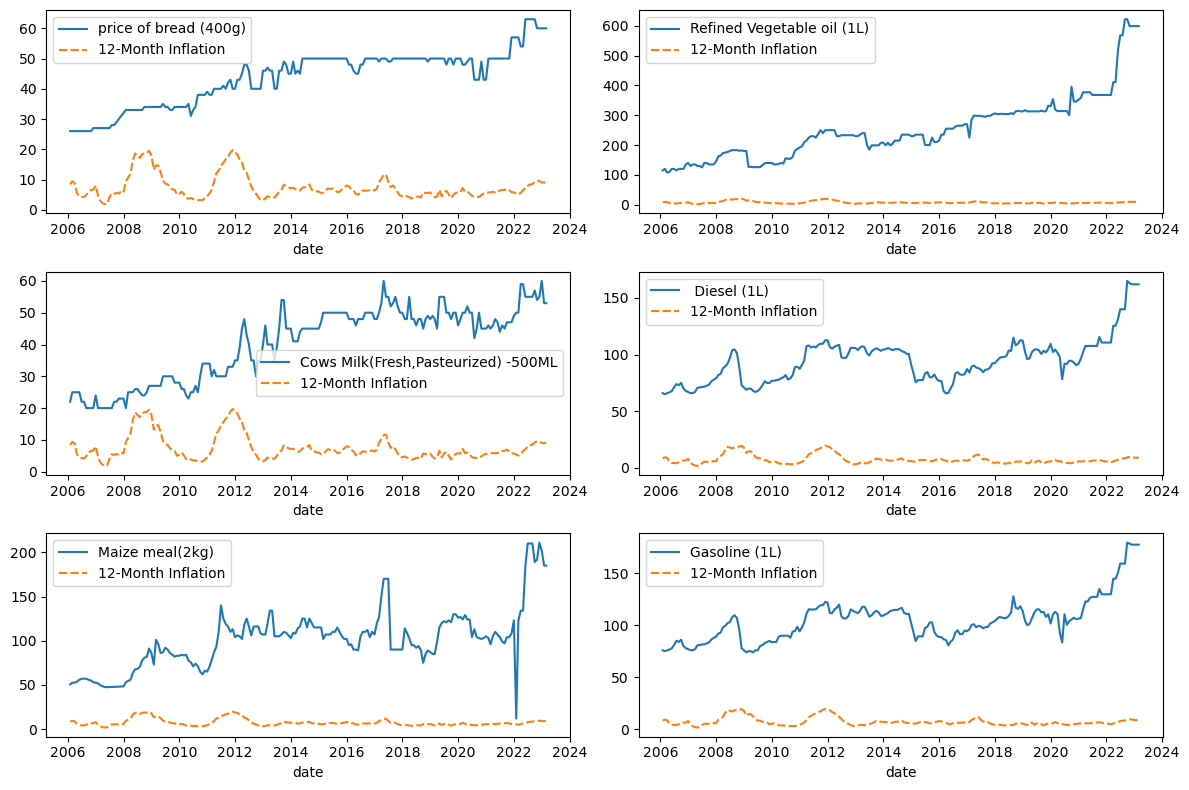

In [68]:
# Plot time series data
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
sns.lineplot(data=time_series_data[['price of bread (400g)', '12-Month Inflation']], ax=axs[0,0])
sns.lineplot(data=time_series_data[['Refined Vegetable oil (1L)', '12-Month Inflation']], ax=axs[0,1])
sns.lineplot(data=time_series_data[['Cows Milk(Fresh,Pasteurized) -500ML', '12-Month Inflation']], ax=axs[1,0])
sns.lineplot(data=time_series_data[[' Diesel (1L)', '12-Month Inflation']], ax=axs[1,1])
sns.lineplot(data=time_series_data[['Maize meal(2kg)', '12-Month Inflation']], ax=axs[2,0])
sns.lineplot(data=time_series_data[['Gasoline (1L)', '12-Month Inflation']], ax=axs[2,1])
plt.tight_layout()
plt.show()

#### Commodity Prices and Exchange Rate over Time

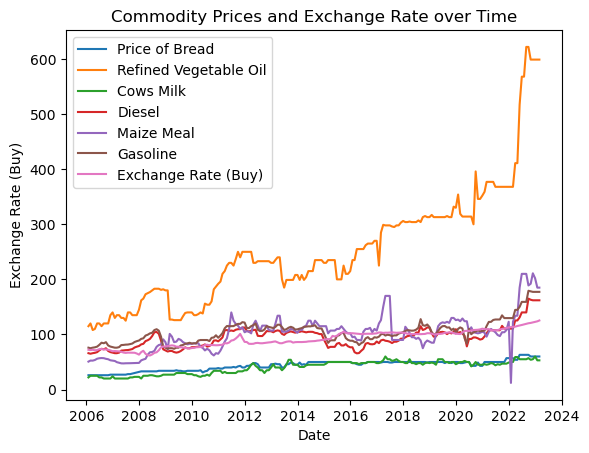

In [69]:
plt.plot(time_series_data.index, time_series_data['price of bread (400g)'], label='Price of Bread')
plt.plot(time_series_data.index, time_series_data['Refined Vegetable oil (1L)'], label='Refined Vegetable Oil')
plt.plot(time_series_data.index, time_series_data['Cows Milk(Fresh,Pasteurized) -500ML'], label='Cows Milk')
plt.plot(time_series_data.index, time_series_data[' Diesel (1L)'], label='Diesel')
plt.plot(time_series_data.index, time_series_data['Maize meal(2kg)'], label='Maize Meal')
plt.plot(time_series_data.index, time_series_data['Gasoline (1L)'], label='Gasoline')
plt.plot(time_series_data.index, time_series_data['Buy'], label='Exchange Rate (Buy)')

plt.xlabel('Date')
plt.ylabel('Exchange Rate (Buy)')
plt.title('Commodity Prices and Exchange Rate over Time')
plt.legend()

plt.show()


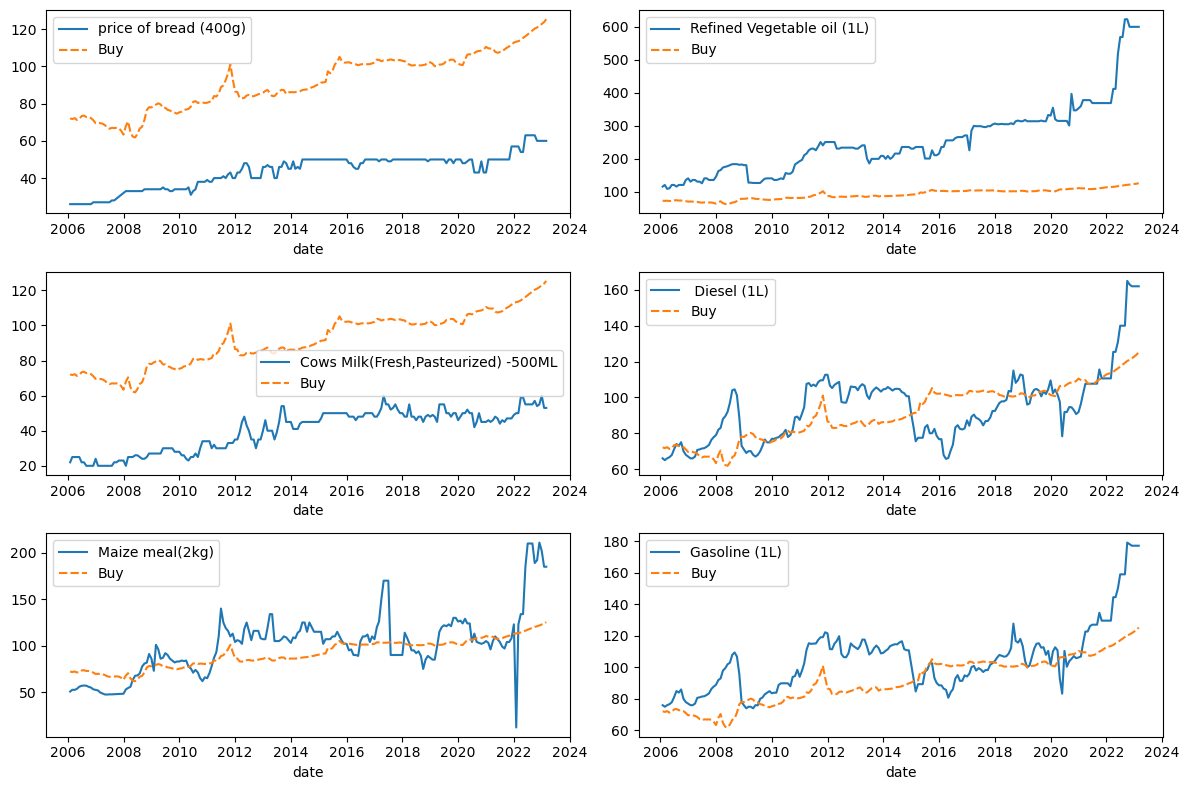

In [70]:
# Plot time series data
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
sns.lineplot(data=time_series_data[['price of bread (400g)', 'Buy']], ax=axs[0,0])
sns.lineplot(data=time_series_data[['Refined Vegetable oil (1L)', 'Buy']], ax=axs[0,1])
sns.lineplot(data=time_series_data[['Cows Milk(Fresh,Pasteurized) -500ML', 'Buy']], ax=axs[1,0])
sns.lineplot(data=time_series_data[[' Diesel (1L)', 'Buy']], ax=axs[1,1])
sns.lineplot(data=time_series_data[['Maize meal(2kg)', 'Buy']], ax=axs[2,0])
sns.lineplot(data=time_series_data[['Gasoline (1L)', 'Buy']], ax=axs[2,1])
plt.tight_layout()
plt.show()

#### Commodity Prices and Exchange Rate and Inflation over time

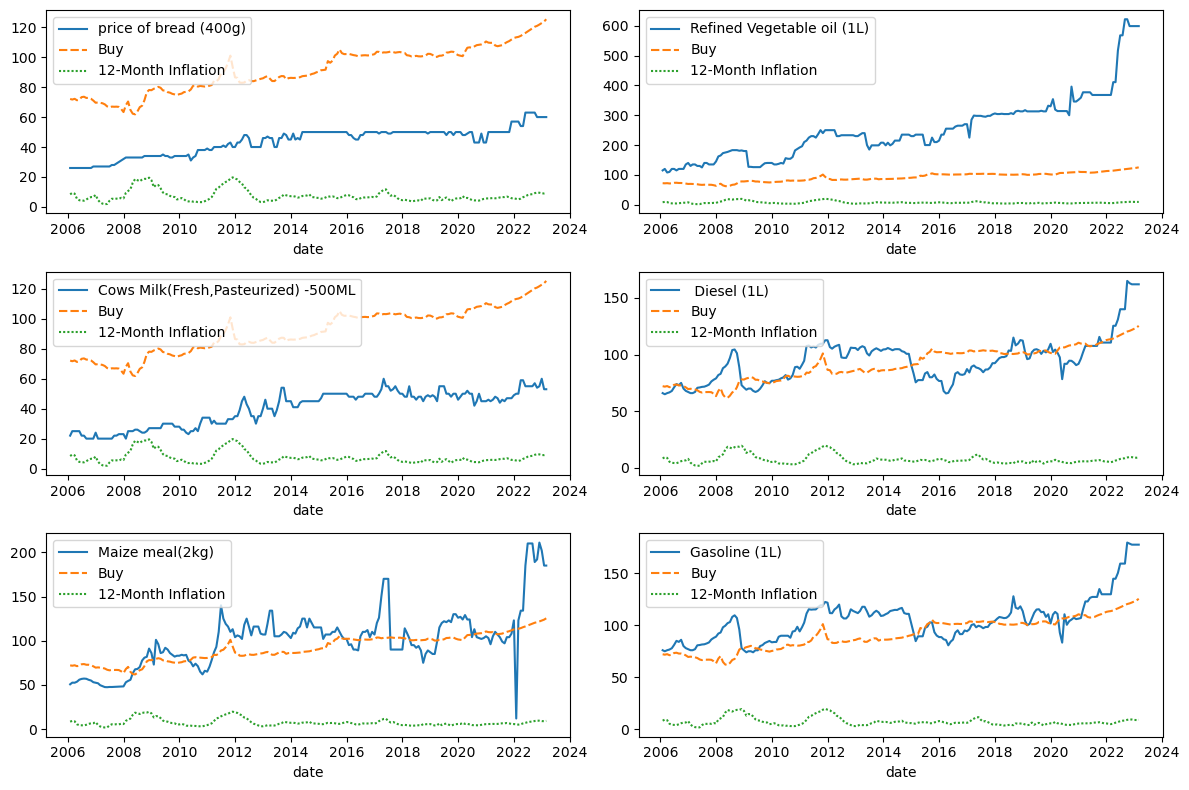

In [71]:
# Plot time series data
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
sns.lineplot(data=time_series_data[['price of bread (400g)', 'Buy','12-Month Inflation']], ax=axs[0,0])
sns.lineplot(data=time_series_data[['Refined Vegetable oil (1L)', 'Buy', '12-Month Inflation']], ax=axs[0,1])
sns.lineplot(data=time_series_data[['Cows Milk(Fresh,Pasteurized) -500ML', 'Buy', '12-Month Inflation']], ax=axs[1,0])
sns.lineplot(data=time_series_data[[' Diesel (1L)', 'Buy', '12-Month Inflation']], ax=axs[1,1])
sns.lineplot(data=time_series_data[['Maize meal(2kg)', 'Buy', '12-Month Inflation']], ax=axs[2,0])
sns.lineplot(data=time_series_data[['Gasoline (1L)', 'Buy', '12-Month Inflation']], ax=axs[2,1])
plt.tight_layout()
plt.show()

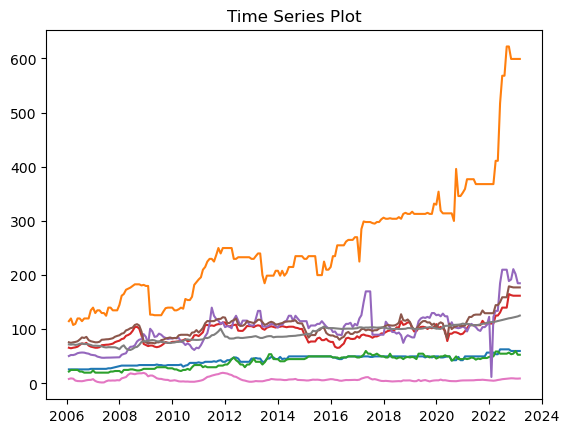

In [72]:
# Plot the data
plt.plot(time_series_data)
plt.title('Time Series Plot')
plt.show()

#### Correlation Matrix

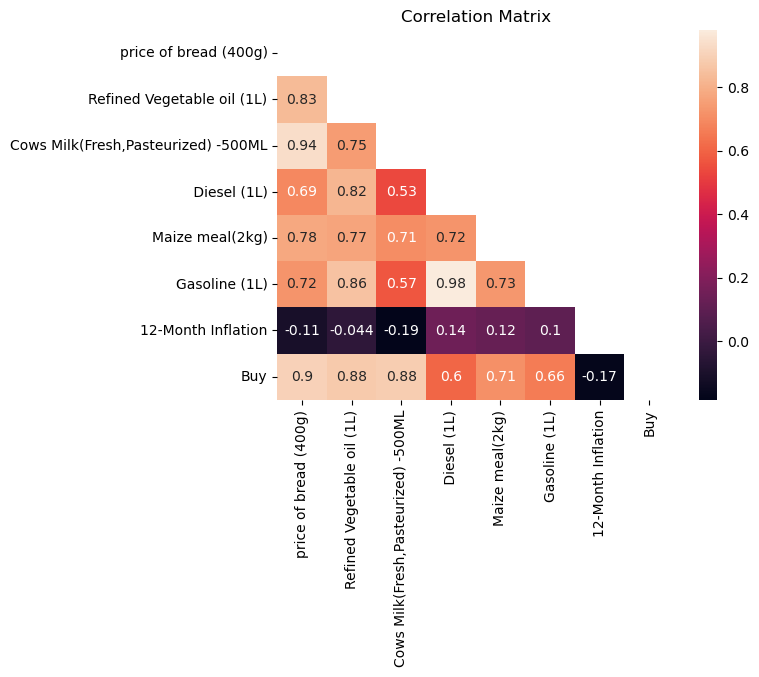

In [73]:
# create a correlation matrix
corr = time_series_data.corr()

# create a mask to hide the upper triangle of the heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
sns.heatmap(corr, mask=mask, annot=True)
plt.title('Correlation Matrix')
plt.show()

## 5. Modeling

### Checking For Stationarity

In [74]:
# Check for stationarity using Augmented Dickey-Fuller (ADF) test
def adf_test(data):
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')
        
adf_test(time_series_data['price of bread (400g)'])
adf_test(time_series_data['Refined Vegetable oil (1L)'])
adf_test(time_series_data['Cows Milk(Fresh,Pasteurized) -500ML'])
adf_test(time_series_data[' Diesel (1L)'])
adf_test(time_series_data['Maize meal(2kg)'])
adf_test(time_series_data['Gasoline (1L)'])

ADF Statistic: -1.1278551865585613
p-value: 0.7038367344234686
Critical Values:
1%: -3.4648754262570978
5%: -2.876714157488788
10%: -2.574858699001736
ADF Statistic: 1.0577629903644143
p-value: 0.9948395263451192
Critical Values:
1%: -3.4626576734812318
5%: -2.8757444215841326
10%: -2.5743412314098753
ADF Statistic: -1.1859366933525173
p-value: 0.6796159462768698
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
ADF Statistic: -0.4852759101706022
p-value: 0.8948579178769456
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
ADF Statistic: -2.194194537150404
p-value: 0.20835924842261944
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
ADF Statistic: -0.15788856274327678
p-value: 0.9433585619537145
Critical Values:
1%: -3.4626576734812318
5%: -2.8757444215841326
10%: -2.5743412314098753


The test produces an ADF statistic and a p-value. The null hypothesis of the test is that the time series is non-stationary (has a unit root) and the alternative hypothesis is that it is stationary.

In each case, the ADF statistic is provided, along with the p-value and the critical values at the 1%, 5%, and 10% levels. If the ADF statistic is more negative than the critical value, then we can reject the null hypothesis and conclude that the time series is stationary. Conversely, if the ADF statistic is less negative than the critical value, we fail to reject the null hypothesis and conclude that the time series is non-stationary.

Based on these results, we can see that in most cases, we fail to reject the null hypothesis, indicating that the time series are likely non-stationary. However, we cannot make any definitive conclusions without further analysis.

In [75]:
# Create a dictionary to hold the ADF test results
results = {}

# Loop through each column in the dataframe and perform ADF test
for column in time_series_data.columns:
    result = adfuller(time_series_data[column])
    results[column] = {
        'Stationary?': 'not stationary' if result[1] > 0.05 else 'stationary'
    }

# Create a table from the dictionary of ADF test results
table = pd.DataFrame(results).T
print(table)

                                        Stationary?
price of bread (400g)                not stationary
Refined Vegetable oil (1L)           not stationary
Cows Milk(Fresh,Pasteurized) -500ML  not stationary
 Diesel (1L)                         not stationary
Maize meal(2kg)                      not stationary
Gasoline (1L)                        not stationary
12-Month Inflation                       stationary
Buy                                  not stationary


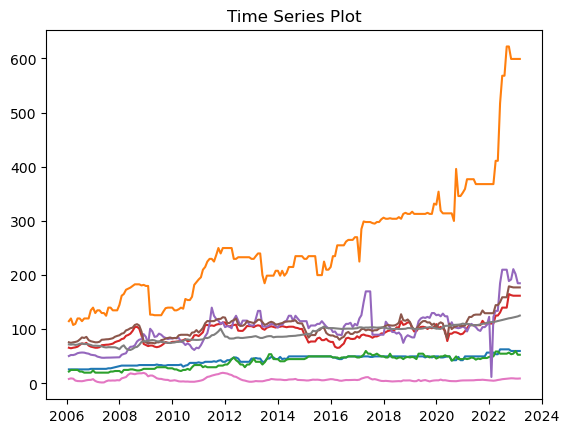

In [76]:
# Plot the data
plt.plot(time_series_data)
plt.title('Time Series Plot')
plt.show()

### Differencing to achieve stationarity

In [77]:
# Take first difference of the non-stationary columns
time_series_data_diff = time_series_data[['price of bread (400g)', 'Refined Vegetable oil (1L)', 'Cows Milk(Fresh,Pasteurized) -500ML', ' Diesel (1L)', 'Maize meal(2kg)', 'Gasoline (1L)', 'Buy', '12-Month Inflation']].diff().dropna()

# Update the results dictionary with the ADF test results for the differenced columns
for column in time_series_data_diff.columns:
    result = adfuller(time_series_data_diff[column])
    results[column] = {
        'Stationary?': 'not stationary' if result[1] > 0.05 else 'stationary'
    }

# Create a table from the updated dictionary of ADF test results
table = pd.DataFrame(results).T
print(table)

                                    Stationary?
price of bread (400g)                stationary
Refined Vegetable oil (1L)           stationary
Cows Milk(Fresh,Pasteurized) -500ML  stationary
 Diesel (1L)                         stationary
Maize meal(2kg)                      stationary
Gasoline (1L)                        stationary
12-Month Inflation                   stationary
Buy                                  stationary


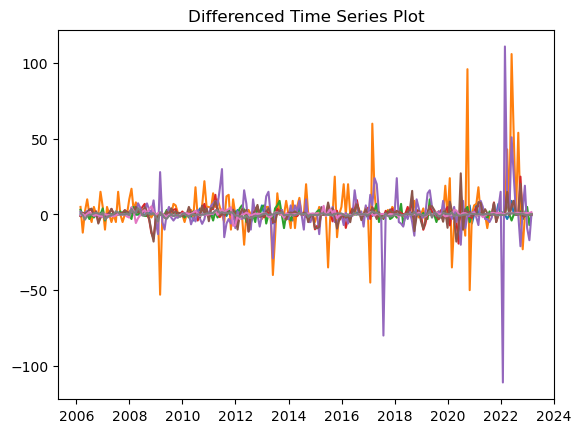

In [78]:
# Plot the data
plt.plot(time_series_data_diff)
plt.title('Differenced Time Series Plot')
plt.show()

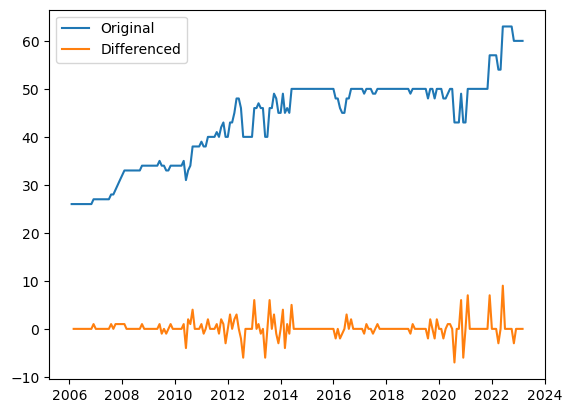

In [79]:
plt.plot(time_series_data['price of bread (400g)'])
plt.plot(time_series_data_diff['price of bread (400g)'])
plt.legend(['Original', 'Differenced'])
plt.show()

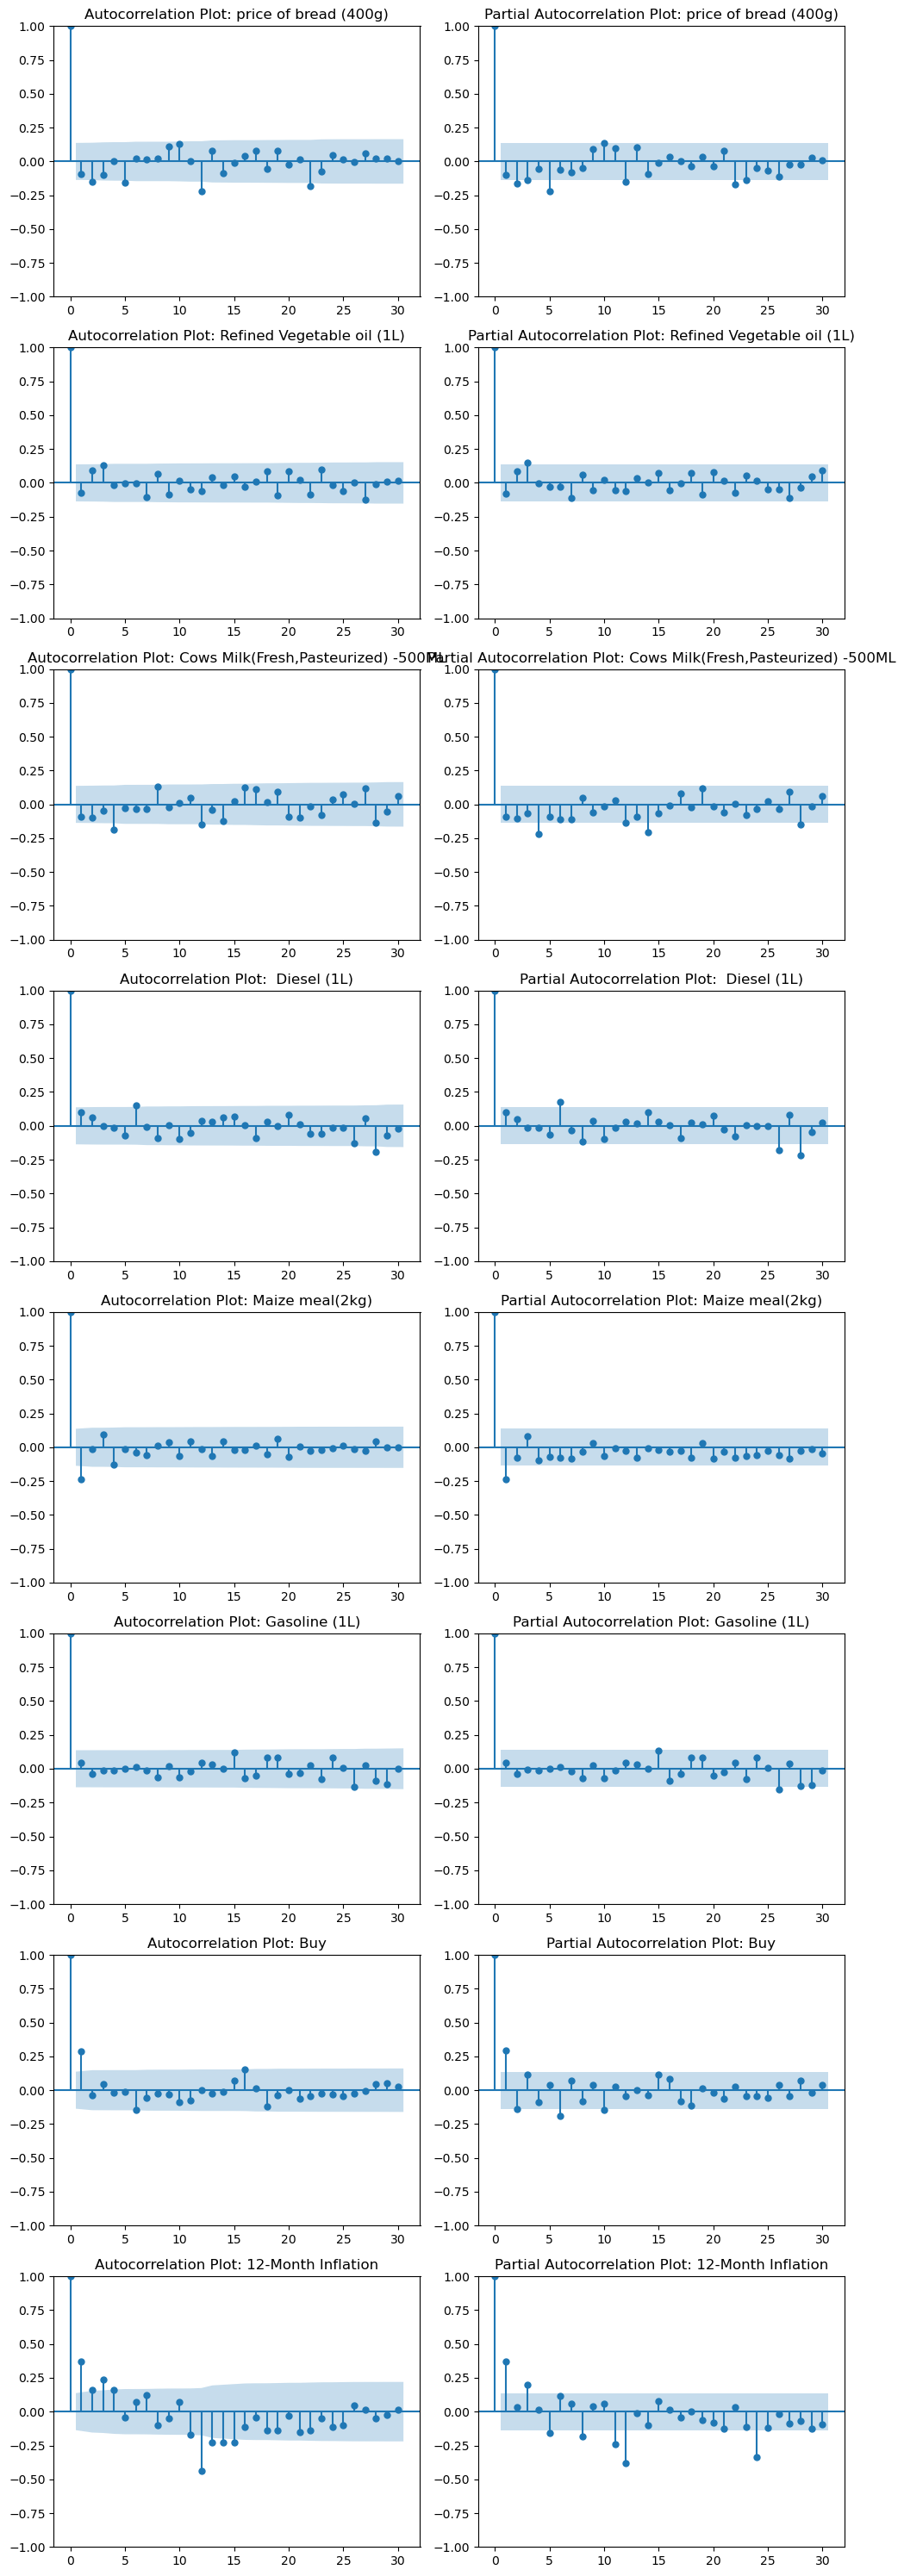

In [80]:
# Plot ACF and PACF for each column
fig, axes = plt.subplots(nrows=len(time_series_data_diff.columns), ncols=2, figsize=(10, 30))
for i, column in enumerate(time_series_data_diff.columns):
    plot_acf(time_series_data_diff[column], ax=axes[i][0], lags=30)
    axes[i][0].set_title(f'Autocorrelation Plot: {column}')
    plot_pacf(time_series_data_diff[column], ax=axes[i][1], lags=30)
    axes[i][1].set_title(f'Partial Autocorrelation Plot: {column}')
plt.tight_layout()
plt.show()

### Model Selection

In [81]:
# Split the data into train and test sets
train_data = time_series_data_diff[:'2022-09-01']
test_data = time_series_data_diff['2022-09-01':]

### Model 1: SARIMA model

In [82]:
# Define a dictionary to store the RMSE values for each model
rmse_dict = {'SARIMA': [], 'SES': [], 'HWES': [], 'ARIMA': []}

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Iterate through each column and fit a SARIMA model
for col in time_series_data_diff.columns:

    # Select the column as the endogenous variable
    endog = train_data[col]

    # Fit the SARIMA model
    model = SARIMAX(endog, order=(1,1,1), seasonal_order=(1,1,1,12))
    fitted_model = model.fit()

    # Evaluate the model's performance on the test set
    predictions = fitted_model.forecast(len(test_data))
    mse = ((predictions - test_data[col]) ** 2).mean()
    rmse = np.sqrt(mse)
    rmse_dict['SARIMA'].append(rmse)
    print("RMSE for {}: {}".format(col, rmse))

RMSE for price of bread (400g): 1.9622814222399387
RMSE for Refined Vegetable oil (1L): 33.36490654054155
RMSE for Cows Milk(Fresh,Pasteurized) -500ML: 3.630707923566939
RMSE for  Diesel (1L): 9.911460755225052
RMSE for Maize meal(2kg): 13.971491843676315
RMSE for Gasoline (1L): 8.383976572406517
RMSE for Buy: 0.9213168858962176
RMSE for 12-Month Inflation: 0.36978316014009693


### Model 2: Simple Exponential Smoothing

In [84]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Iterate through each column and fit an SES model
for col in time_series_data_diff.columns:
    
    # Select the column as the endogenous variable
    endog = train_data[col]

    # Fit the SES model
    model = SimpleExpSmoothing(endog)
    fitted_model = model.fit()

    # Evaluate the model's performance on the test set
    predictions = fitted_model.forecast(len(test_data))
    mse = ((predictions - test_data[col]) ** 2).mean()
    rmse = np.sqrt(mse)
    rmse_dict['SES'].append(rmse)
    print("RMSE for {}: {}".format(col, rmse))

RMSE for price of bread (400g): 1.3116781244225155
RMSE for Refined Vegetable oil (1L): 17.192531941707507
RMSE for Cows Milk(Fresh,Pasteurized) -500ML: 3.8476900517786783
RMSE for  Diesel (1L): 10.11983104633717
RMSE for Maize meal(2kg): 14.287943773956178
RMSE for Gasoline (1L): 8.1147031247686
RMSE for Buy: 0.8092839004930007
RMSE for 12-Month Inflation: 0.4553944825952488


### Model 3: Holt-Winters Exponential Smoothing (HWES)

In [85]:
from statsmodels.tsa.api import ExponentialSmoothing

# Iterate through each column and fit an HWES model
for col in time_series_data_diff.columns:
    
    # Select the column as the endogenous variable
    endog = train_data[col]

    # Fit the HWES model
    model = ExponentialSmoothing(endog, seasonal_periods=12, trend='add', seasonal='add')
    fitted_model = model.fit()

    # Evaluate the model's performance on the test set
    predictions = fitted_model.forecast(len(test_data))
    mse = ((predictions - test_data[col]) ** 2).mean()
    rmse = np.sqrt(mse)
    rmse_dict['HWES'].append(rmse)
    print("RMSE for {}: {}".format(col, rmse))


RMSE for price of bread (400g): 1.4683786947359614
RMSE for Refined Vegetable oil (1L): 12.425003528736147
RMSE for Cows Milk(Fresh,Pasteurized) -500ML: 3.6111269266328967
RMSE for  Diesel (1L): 9.769505312367828
RMSE for Maize meal(2kg): 13.367423769782318
RMSE for Gasoline (1L): 7.994059842815829
RMSE for Buy: 0.9414019467970235
RMSE for 12-Month Inflation: 0.45961519499739484


### Model 4: Arima Model

In [86]:
# Iterate through each column and fit an ARIMA model
for col in time_series_data_diff.columns:

    # Select the column as the endogenous variable
    endog = train_data[col]

    # Fit the ARIMA model
    model = ARIMA(endog, order=(1,1,1))
    fitted_model = model.fit()

    # Evaluate the model's performance on the test set
    predictions = fitted_model.forecast(len(test_data))
    mse = ((predictions - test_data[col]) ** 2).mean()
    rmse = np.sqrt(mse)
    rmse_dict['ARIMA'].append(rmse)
    print("RMSE for {}: {}".format(col, rmse))


RMSE for price of bread (400g): 1.311532745821097
RMSE for Refined Vegetable oil (1L): 30.03783664358704
RMSE for Cows Milk(Fresh,Pasteurized) -500ML: 3.8466328440732234
RMSE for  Diesel (1L): 10.141644670829374
RMSE for Maize meal(2kg): 14.335481103953226
RMSE for Gasoline (1L): 8.124814291146016
RMSE for Buy: 0.7660634276759561
RMSE for 12-Month Inflation: 0.3491979778513782


### Models Comparison

In [87]:
# Create a DataFrame to compare the RMSE values
rmse_df = pd.DataFrame.from_dict(rmse_dict, orient='index', columns=time_series_data_diff.columns)
transposed_df = rmse_df.transpose()
print(transposed_df)

                                        SARIMA        SES       HWES  \
price of bread (400g)                 1.962281   1.311678   1.468379   
Refined Vegetable oil (1L)           33.364907  17.192532  12.425004   
Cows Milk(Fresh,Pasteurized) -500ML   3.630708   3.847690   3.611127   
 Diesel (1L)                          9.911461  10.119831   9.769505   
Maize meal(2kg)                      13.971492  14.287944  13.367424   
Gasoline (1L)                         8.383977   8.114703   7.994060   
Buy                                   0.921317   0.809284   0.941402   
12-Month Inflation                    0.369783   0.455394   0.459615   

                                         ARIMA  
price of bread (400g)                 1.311533  
Refined Vegetable oil (1L)           30.037837  
Cows Milk(Fresh,Pasteurized) -500ML   3.846633  
 Diesel (1L)                         10.141645  
Maize meal(2kg)                      14.335481  
Gasoline (1L)                         8.124814  
Buy     

In [88]:
best_models = transposed_df.idxmin(axis=1)
print(best_models)

price of bread (400g)                  ARIMA
Refined Vegetable oil (1L)              HWES
Cows Milk(Fresh,Pasteurized) -500ML     HWES
 Diesel (1L)                            HWES
Maize meal(2kg)                         HWES
Gasoline (1L)                           HWES
Buy                                    ARIMA
12-Month Inflation                     ARIMA
dtype: object


### Model Fitting

In [89]:
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
#train_data = time_series_data.iloc[:int(len(time_series_data)*0.8)]
#test_data = time_series_data.iloc[int(len(time_series_data)*0.8):]

# Fit the best model for each time series using the entire training set
for col in best_models.index:
    model_name = best_models[col]
    if model_name == 'ARIMA':
        model = ARIMA(train_data[col], order=(1, 1, 0))
    elif model_name == 'SARIMA':
        model = SARIMAX(train_data[col], order=(1, 1, 0), seasonal_order=(1, 0, 0, 12))
    elif model_name == 'SES':
        model = SimpleExpSmoothing(train_data[col])
    elif model_name == 'HWES':
        model = ExponentialSmoothing(train_data[col], seasonal_periods=12, trend='add', seasonal='add')
    else:
        raise ValueError(f"Unknown model name: {model_name}")
    fitted_model = model.fit()

    # Make predictions on the testing set
    predictions = fitted_model.forecast(len(test_data))

    # Compare the predicted values with the actual values to evaluate model performance
    rmse = np.sqrt(mean_squared_error(test_data[col], predictions))
    print(f"{col}: {model_name} RMSE = {rmse}")


price of bread (400g): ARIMA RMSE = 1.224744871391589
Refined Vegetable oil (1L): HWES RMSE = 12.425003528736147
Cows Milk(Fresh,Pasteurized) -500ML: HWES RMSE = 3.6111269266328967
 Diesel (1L): HWES RMSE = 9.769505312367828
Maize meal(2kg): HWES RMSE = 13.367423769782318
Gasoline (1L): HWES RMSE = 7.994059842815829
Buy: ARIMA RMSE = 0.29048715660300267
12-Month Inflation: ARIMA RMSE = 0.38282379935270244


### Model Evaluation

In [96]:
# Create an empty DataFrame to store the forecasts
forecast_df = pd.DataFrame()

# Fit the best model for each time series using the entire dataset
for col in best_models.index:
    model_name = best_models[col]
    if model_name == 'ARIMA':
        model = ARIMA(time_series_data[col], order=(1, 1, 0))
    elif model_name == 'SARIMA':
        model = SARIMAX(time_series_data[col], order=(1, 1, 0), seasonal_order=(1, 0, 0, 12))
    elif model_name == 'SES':
        model = SimpleExpSmoothing(time_series_data[col])
    elif model_name == 'HWES':
        model = ExponentialSmoothing(time_series_data[col], seasonal_periods=12, trend='add', seasonal='add')
    else:
        raise ValueError(f"Unknown model name: {model_name}")
    fitted_model = model.fit()

    # Forecast future values
    forecast = fitted_model.forecast(steps=12)

    # Store the forecasted values in the DataFrame
    forecast_df[col] = forecast

# Set the index of the DataFrame to be the forecasted dates
forecast_df.index = pd.date_range(start='2023-03-31', periods=12, freq='M')

# Print the DataFrame
print(forecast_df)


            price of bread (400g)  Refined Vegetable oil (1L)  \
2023-03-31                   60.0                  603.366326   
2023-04-30                   60.0                  603.216755   
2023-05-31                   60.0                  608.750532   
2023-06-30                   60.0                  609.309167   
2023-07-31                   60.0                  611.016095   
2023-08-31                   60.0                  616.119488   
2023-09-30                   60.0                  625.042101   
2023-10-31                   60.0                  620.623810   
2023-11-30                   60.0                  624.684642   
2023-12-31                   60.0                  626.029372   
2024-01-31                   60.0                  626.321065   
2024-02-29                   60.0                  628.277261   

            Cows Milk(Fresh,Pasteurized) -500ML   Diesel (1L)  \
2023-03-31                            54.508951    164.506629   
2023-04-30              